<a href="https://colab.research.google.com/github/harperd/machine-learning/blob/master/notebooks/univariate-linear-regression-with-gradient-descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate Linear Regression and Gradient Descent

## Import Python Packages

In [0]:
# NumPy adds support for large, multi-dimensional arrays and matrices, along with a large collection 
# of high-level mathematical functions to operate on these arrays.
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics 
# extension NumPy. It provides an object-oriented API for embedding plots into applications using 
# general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
import matplotlib.pyplot as plt
%matplotlib inline

# Pandas is a software library for data manipulation and analysis. In particular, it offers data 
# structures and operations for manipulating numerical tables and time series.
import pandas as pd

# Hypothesis Function

In machine learning, a *hypothesis* function is used to predict outcomes or $y$ values. Below is the univariate linear regression hypothesis function where theta ($\theta$) can represent any two numbers and $h_\theta(x)$ or $y$ is our *prediction*. We just have to figure out what those two numbers are that allow the function to best intersect our data or features. It's a simple linear equation but finding the best theta values is where the challenge lies.

> $h_{\theta }( x) =\theta _{0} \ +\ \theta _{1} x$

In [0]:
# Hypothesis Function - This function will compute predictions for all features. 
#
# Parameters
#     theta: The two theta values as an array [ theta1, theta2 ]
#     X: A DataFrame containing the features to create predictions against.
def hypothesis(theta, X):
    # Here, X is a Pandas DataFrame containing all of our data.
    # X.shape returns tuple of the shape's dimentions in rows x columns.
    # Therefore, X.shape[0] will get us the number of rows, or features.
    num_features = len(X)
    
    # numpy.ones returns a new array of given shape, filled with ones.
    # Here, we want a new array (vector) of size num_features x 1 (rows x columns).
    h = np.ones((num_features, 1))
    
    # Loop through each feature (x) in our data set.
    #
    # TODO: Perform this in a more optimal manner using matrix multiplication
    #       against the entire feature set, X.
    for i in range(0, num_features):
        # Get the next feature value.
        feature_value = X[i]
        
        # Here, we are going to concatinate a 1x1 vector containing the value 
        # of 1 with a 1x1 vector containing the feature value with the result 
        # being a 1x2 vector.
        #
        # After the concatination, our 1x2 vector resembles the below, if our
        # feature_value = 3:
        #
        #    x = [ 1 3 ]
        #
        vector_one = np.ones(1)
        vector_feature = np.array(feature_value)
        
        x = np.concatenate((vector_one, vector_feature), axis = 0)
        
        # Finally, we multiply the vector x with our two theta values and
        # assign it to h[i]:
        #
        # h[i] = [ theta1 theta2 ] * [ 1 feature ]
        #
        h[i] = float(np.matmul(theta, x))
    
    return h

We can choose good theta values by using the *Cost Function* denoted as $J(\theta_{0}, \theta_{1})$ where  $\theta_{0}$, and $\theta_{1}$ points on the $x$,$y$ axis and $J(\theta_{0}, \theta_{1})$ is *z*. This is also called the *Squared Error Function* which is the most commonly used for linear regression problems. Here, we want to get the results of our cost function as close to zero as possible by trying different values for $\theta _{0}$ and $\theta _{1}$.

> $\large J( \theta _{0} ,\ \theta _{1}) =\frac{1}{2m}\sum\limits ^{m}_{i=1}\left( h_{\theta }\left( x^{( i)}\right) -y^{( i)}\right)^{2}$

In [0]:
def compute_cost(theta, X, y):
  # Get the number of examples
  m = len(y)
  
  # Perform matrix multiplication between our feature set X and theta values.
  predictions = hypothesis(theta, X)
  
  # Compute the cost of the predictions
  cost = np.sum(np.square(predictions - y)) / (2*m)
  
  return cost

## Gradient Descent

What *Gradient Descent* algorithm does is *simultaneously* compute values for $\theta_{0}$ and $\theta_{1}$. What is meant by *simultaneously* is represented in the pseudo code below where $\theta_{0}$ and $\theta_{1}$ are assigned new values at the same time. In other words, if $\theta_{0}$ was set ($\theta_{0} :=$ *temp0*) *before* temp1 was set (*temp1* $:= \theta_{1}-\alpha\frac{\partial}{\partial\theta_{1}}J(\theta_{0},\theta_{1})$) then it would affect the results of temp1 and yield incorrect results. We want to repeat this series of steps until we reach *convergence* or $\theta_{0}$ and $\theta_{1}$ are at their minimum.

>*repeat until convergence {* 

>$temp 0:= \theta_{0}-\alpha\frac{1}{m}\sum\limits ^{m}_{i=1}\left( h_{\theta }\left( x^{(i)}\right) -y^{( i)}\right)$

>$temp1 := \theta_{1}-\alpha\frac{1}{m}\sum\limits ^{m}_{i=1}\left( h_{\theta }\left( x^{(i)}\right) -y^{( i)}\right)\cdot x^{(i)}$

>$\theta_{0} := temp0$

>$\theta_{1} := temp1$

>*}* 

In [0]:
def gradient_descent2(theta, alpha, X, y):
   # Get the number of examples
    m = len(y)

    converged = False
    report = []
    iteration = 1
    p_theta = [ -1, -1 ]
    temp = [ 0, 0 ]
    
    X[:,:-1] = np.ones(1)

    # Keep trying until we have converged at the local minimum.
    while(not converged):
        # Try a prediction with current theta values.
        # y = h(x)
        predictions = hypothesis(theta, X)
        
        # Compute the cost i.e. J(theta0, theta1)
        cost = compute_cost(theta, X, y)
        
        #temp[0]=theta[0]-(alpha)*((np.sum(predictions-y))/m)
        #temp[1]=theta[1]-(alpha)*((np.sum((predictions-y)*X))/m)
        #theta=temp
 

        #temp[0] = theta[0] - alpha * (np.sum(predictions - y) / m)
        #temp[1] = theta[1] - alpha * (np.sum(np.matmul(predictions - y, X.T)) / m)
    
        temp = theta - alpha * ((np.matmul(hypothesis(theta, predictions - y), X.T)) / m)
 
        theta = temp
        
       # print('theta = ' + str(theta))
       # print('p_theta = ' + str(p_theta))
        
        # Check to see if we have converged or not.
        converged = theta[0] == p_theta[0] and theta[1] == p_theta[1]
        
        # Set the optimal theta to the current theta.
        p_theta = theta
        
        # Get data to report
        if(iteration % 20 == 0 or converged):
          report.append([ 
              'Converged -->' if converged else '', 
              iteration, 
              cost, 
              theta[0], 
              theta[1]])

        iteration = iteration + 1
        
    # Convert our report data to a Pandas DataFrame for better rendering.
    df_report = pd.DataFrame(
        report, 
        columns = [ 'Converged', 'Iteration', 'Cost', 'Theta0', 'Theta1' ]);

    return theta, df_report

In [0]:
# Helper function to see if we have converged to the local minimum.
def is_converged(c_theta, p_theta):
  return c_theta[0] == p_theta[0] and c_theta[1] == p_theta[1]

# Gradient Descent Algorithm - Performs Gradient Descent.
#
# Parameters
#     theta: The two theta values as an array [ theta1, theta2 ]
#     alpha: The learning rate.
#     iterations: The number of iterations to perform.
#     X: The feature set.
#     y: The target variable set.
def gradient_descent(theta, alpha, X, y):
    # Get the number of examples
    m = len(y)

    converged = False
    report = []
    optimal_theta = theta
    iteration = 1

    # Keep trying until we have converged at the local minimum.
    while(not converged):
        # Try a prediction with current theta values.
        # y = h(x)
        predictions = hypothesis(theta, X)
        
        # Compute the cost i.e. J(theta0, theta1)
        cost = compute_cost(theta, X, y)
        
        # Compute the average gradient per example.
        # 1/m * sum(h(x) - y) * X
        gradient = np.dot(X.T, predictions - y) / m
        
        # Update theta
        theta = ( theta - alpha * gradient )
        theta = theta[len(theta) - 1]
        
        # Check to see if we have converged or not.
        converged = is_converged(theta, optimal_theta)
        
        # Set the optimal theta to the current theta.
        optimal_theta = theta
        
        # Get data to report
        if(iteration % 20 == 0 or converged):
          report.append([ 
              'Converged -->' if converged else '', 
              iteration, 
              cost, 
              optimal_theta[0], 
              optimal_theta[1]])

        iteration = iteration + 1
        
    # Convert our report data to a Pandas DataFrame for better rendering.
    df_report = pd.DataFrame(
        report, 
        columns = [ 'Converged', 'Iteration', 'Cost', 'Theta0', 'Theta1' ]);

    return optimal_theta, df_report

In [129]:
# Generate random samples
num_samples = 10

# Generate some random inpendent variables (features)
X = pd.DataFrame(2 * np.random.rand(num_samples, 1), columns = [ 'Feature' ])

# Add a bias column of all ones to the beginning of our DataFrame
# since theta0 will not have a feature.
X.insert(0, 'bias', np.ones(num_samples))

# Generate some random depenant variables
X = X.join(pd.DataFrame(4 + 3 * X.as_matrix(columns=X.columns[1:]) + np.random.randn(num_samples, 1), columns = [ 'Outcome' ]))

X
                                                                
# Plot our random samples
#plt.plot(X.values, y.values, 'b.')
#plt.xlabel("$x$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
#_ =plt.axis([0,2,0,15])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


,bias,Feature,Outcome
0,1.0,1.075207,7.543828
1,1.0,1.198582,6.538832
2,1.0,0.669181,6.886811
3,1.0,0.731653,5.322457
4,1.0,1.872674,7.166983
5,1.0,1.110586,9.195941
6,1.0,1.909329,9.539656
7,1.0,0.764470,6.987822
8,1.0,1.508291,7.277869
9,1.0,1.822638,10.024566


In [97]:
# Initialize theta and set our learning rate.
theta = [ 0, 0 ]
learning_rate = 0.1

# Perform Gradient Descent
theta, report = gradient_descent(theta, learning_rate, X, y)

# Show the Gradent Descent report
pd.option_context('display.float_format', '{:,.20f}'.format)
report

KeyboardInterrupt: ignored

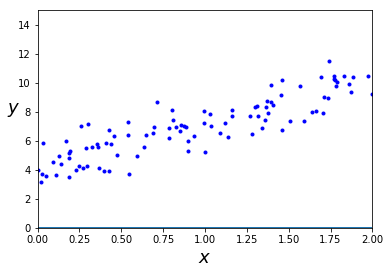

In [98]:
# Execute our hypothesis with our optimal theta values.
training_predictions = hypothesis(theta, X)

# Plot the results.
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(X, training_predictions)
_ =plt.axis([0,2,0,15])